In [4]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

plt.rcParams["font.family"] = ""


def seed_everything(seed):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    # pythonhashseed 환경변수 설정
    np.random.seed(seed)


seed_everything(42)

import warnings

warnings.filterwarnings("ignore")

In [5]:
path = "C:/Users/yis82/OneDrive/Desktop/daegu-traffic-accident-prediction/data"
fpath = "C:/Users/yis82/OneDrive/Desktop/daegu-traffic-accident-prediction/data/external_open"
npath = (
    "C:/Users/yis82/OneDrive/Desktop/daegu-traffic-accident-prediction/data/new_data"
)

In [6]:
train_data = pd.read_csv(path + "/train.csv")
test_data = pd.read_csv(path + "/test.csv")
CCTV = pd.read_csv(fpath + "/대구 CCTV 정보.csv", encoding="cp949")
light = pd.read_csv(fpath + "/대구 보안등 정보.csv", encoding="cp949", low_memory=False)
child_protect = pd.read_csv(fpath + "/대구 어린이 보호 구역 정보.csv", encoding="cp949")
parking = pd.read_csv(fpath + "/대구 주차장 정보.csv", encoding="cp949")
crossboard = pd.read_excel(npath + "/법정동별_횡단보도수.xlsx")
numcar = pd.read_csv(npath + "/대구광역시_읍면동별 자동차 등록현황_20211031.csv", encoding="cp949")
senior_center = pd.read_csv(npath + "/대구_경로당현황_법정동_20211110.csv", encoding= 'euc-kr')

In [60]:
train_data

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,49세,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,30세,상해없음,승용,남,52세,경상,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,ACCIDENT_39604,2021-12-31 19,금요일,맑음,대구광역시 수성구 수성동3가,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,승용,여,52세,상해없음,이륜,남,28세,경상,0,0,1,0,3
39605,ACCIDENT_39605,2021-12-31 19,금요일,맑음,대구광역시 달서구 상인동,단일로 - 기타,건조,차대차,측면충돌,안전거리미확보,승용,여,60세,상해없음,승용,남,52세,경상,0,0,1,0,3
39606,ACCIDENT_39606,2021-12-31 21,금요일,맑음,대구광역시 달서구 월성동,교차로 - 교차로안,건조,차대차,측면충돌,교차로운행방법위반,승용,남,60세,중상,승용,남,73세,중상,0,2,0,0,10
39607,ACCIDENT_39607,2021-12-31 22,금요일,맑음,대구광역시 달서구 장동,기타 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,40세,상해없음,승용,여,57세,경상,0,0,1,0,3


In [7]:
train = train_data.copy()
test = test_data.copy()

In [8]:
time_pattern = r"(\d{4})-(\d{1,2})-(\d{1,2}) (\d{1,2})"
# 날짜와 시간을 추출하기 위한 정규표현식
# \d{4}는 연도(4자리 숫자), \d{1,2}는 월과 일(1자리 또는 2자리 숫자), 그리고 \d{1,2}는 시간(1자리 또는 2자리 숫자)

train[["연", "월", "일", "시간"]] = train["사고일시"].str.extract(time_pattern)
# pd.to_numeric함수는 숫자처럼 보이는 문자들을 숫자로 바꿔줌
train[["연", "월", "일", "시간"]] = train[["연", "월", "일", "시간"]].apply(
    pd.to_numeric
)  # 추출된 문자열을 수치화
train = train.drop(columns=["사고일시"])  # 정보 추출이 완료된 '사고일시' 컬럼은 제거

location_pattern = r"(\S+) (\S+) (\S+)"
train[["도시", "구", "동"]] = train["시군구"].str.extract(location_pattern)
train = train.drop(columns=["시군구"])

In [9]:
# test도 train처럼 맞춰주기

# 해당 과정을 test_x에 대해서도 반복해줍니다
test[["연", "월", "일", "시간"]] = test["사고일시"].str.extract(time_pattern)
test[["연", "월", "일", "시간"]] = test[["연", "월", "일", "시간"]].apply(pd.to_numeric)
test = test.drop(columns=["사고일시"])

location_pattern = r"(\S+) (\S+) (\S+)"
test[["도시", "구", "동"]] = test["시군구"].str.extract(location_pattern)
test = test.drop(columns=["시군구"])

In [10]:
def process_location_data(df, address_column, drop_columns):
    location_pattern = r"(\S+) (\S+) (\S+) (\S+)"
    df[["도시", "구", "동", "우편번호"]] = df[address_column].str.extract(location_pattern)
    df = df.drop(drop_columns, axis=1)
    return df

In [11]:
CCTV = process_location_data(CCTV, "소재지지번주소", ["소재지지번주소", "우편번호"])
light = process_location_data(light, "소재지지번주소", ["소재지지번주소", "우편번호"])
parking = process_location_data(parking, "소재지지번주소", ["소재지지번주소", "우편번호"])
child_protect = process_location_data(child_protect, "소재지지번주소", ["소재지지번주소", "우편번호"])
CCTV_notnull = CCTV.dropna(subset=["동"])
light_notnull = light.dropna(subset=`["동"])
parking_notnull = parking.dropna(subset=["동"])
child_protect_notnull = child_protect.dropna(subset=["동"])

In [12]:
child_protect_notnull["주소"] = (
    child_protect_notnull["구"].astype(str)
    + "-"
    + child_protect_notnull["동"].astype(str)
)
child_protect_notnull.drop(["도시","구", "동"], axis=1)

,시설종류,대상시설명,소재지도로명주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자,주소
0,초등학교,남도초등학교,대구광역시 남구 현충동길 74(대명동),35.845027,128.581402,대구광역시,남부경찰서,Y,7.0,6~8,2020-03-23,남구-대명동
1,초등학교,영선초등학교,대구광역시 남구 영선길96(이천동),35.852901,128.596014,대구광역시,남부경찰서,Y,8.0,6~10,2020-03-23,남구-이천동
2,초등학교,성명초등학교,대구광역시 남구 성당로 30길 55(대명동),35.845152,128.570825,대구광역시,남부경찰서,Y,14.0,8~12,2020-03-23,남구-대명동
3,초등학교,남덕초등학교,대구광역시 남구 앞산순환로 93길 33,35.833042,128.573949,대구광역시,남부경찰서,Y,6.0,6~8,2020-03-23,남구-대명동
4,초등학교,대명초등학교,대구광역시 남구 대명로 110,35.838869,128.568889,대구광역시,남부경찰서,Y,5.0,6~10,2020-03-23,남구-대명동
...,...,...,...,...,...,...,...,...,...,...,...,...
635,어린이집,남산교회어린이집,대구광역시 중구 관덕정길 16,35.865040,128.590565,대구광역시 중구청,대구광역시 중부경찰서,Y,5.0,6~10,2019-06-01,중구-남산동
636,초등학교,대구초등학교,대구광역시 중구 명륜로23길 80,35.864037,128.595370,대구광역시 중구청,대구광역시 중부경찰서,Y,12.0,3~12,2019-06-01,중구-봉산동
637,어린이집,대구삼성어린이집,대구광역시 중구 달구벌대로 2016-40,35.864469,128.584301,대구광역시 중구청,대구광역시 중부경찰서,Y,2.0,7~8,2019-06-01,중구-남산동
638,어린이집,동화나라어린이집,대구광역시 중구 남산로3안길 20,35.860371,128.577492,대구광역시 중구청,대구광역시 중부경찰서,Y,5.0,6~8,2019-06-01,중구-남산동


In [13]:
# Example child_protect_df
child_protect_df = (
    child_protect_notnull.groupby("주소").size().reset_index(name="어린이보호구역개수")
)

In [14]:
child_protect_df

,주소,어린이보호구역개수
0,남구-대명동,26
1,남구-봉덕동,8
2,남구-이천동,6
3,달성군-가창면,8
4,달성군-구지면,6
...,...,...
66,중구-봉산동,2
67,중구-삼덕동2가,1
68,중구-삼덕동3가,1
69,중구-서문로1가,1


In [15]:
light_notnull.head()

,보안등위치명,설치개수,소재지도로명주소,위도,경도,설치연도,설치형태,도시,구,동
0,대명1동1,1,대구광역시 남구 현충로 155,35.846703,128.579803,2016.0,한전주,대구광역시,남구,대명동
1,대명1동2,1,대구광역시 남구 현충로31길 10-1,35.846863,128.579406,2016.0,한전주,대구광역시,남구,대명동
2,대명1동3,1,대구광역시 남구 현충로31길 9-8,35.846341,128.579342,2017.0,건축물,대구광역시,남구,대명동
3,대명1동4,2,대구광역시 남구 현충로31길 19-11,35.846368,128.578922,2016.0,한전주,대구광역시,남구,대명동
4,대명1동5,1,대구광역시 남구 현충로29길 22-2,35.845995,128.578858,2016.0,한전주,대구광역시,남구,대명동


In [16]:
light_df = light_notnull.groupby(["구", "동"]).size().reset_index(name="보안등개수")

In [17]:
light_df

,구,동,보안등개수
0,남구,대명동,5253
1,남구,봉덕동,1395
2,남구,이천동,551
3,달서구,갈산동,349
4,달서구,감삼동,932
...,...,...,...
223,중구,태평로2가,38
224,중구,태평로3가,47
225,중구,포정동,18
226,중구,향촌동,28


In [18]:
CCTV_num = CCTV_notnull.groupby(["구","동"]).size().reset_index(name="CCTV개수")
CCTV_pre = CCTV_notnull[["동", "단속구분"]].groupby(["동", "단속구분"]).size().unstack()
CCTV_cat = CCTV_pre.add_prefix("단속구분_")
CCTV_cat = CCTV_cat.fillna(0)
CCTV_df = pd.merge(CCTV_num, CCTV_cat, how="left", on="동")

In [19]:
CCTV_df = CCTV_df.groupby(["구", "동"])["단속구분_1"].unique().reset_index()

In [20]:
# Flatten the lists in "단속구분_1" into separate rows
CCTV_df = CCTV_df.explode("단속구분_1").reset_index(drop=True)

# Convert the dtype of "단속구분_1" to integer
CCTV_df["단속구분_1"] = CCTV_df["단속구분_1"].astype(int)

# Display the result
CCTV_df.rename(columns={'단속구분_1': '과속단속'},inplace=True)

In [21]:
CCTV_df["주소"] = CCTV_df["구"].astype(str) + "-" + CCTV_df["동"].astype(str)
CCTV_df.drop(["구", "동"], axis=1, inplace=True)
train["주소"] = train["구"].astype(str) + "-" + train["동"].astype(str)
test["주소"] = test["구"].astype(str) + "-" + test["동"].astype(str)
crossboard["주소"] = crossboard["구"].astype(str) + "-" + crossboard["법정동"].astype(str)
crossboard.drop(["구", "법정동"], axis=1, inplace=True)
numcar["주소"] = numcar["구군"].astype(str) + "-" + numcar["읍면동"].astype(str)
numcar.drop(["구군", "읍면동","특수","승용","승합","화물"], axis=1, inplace=True)
light_df["주소"] = light_df["구"].astype(str) + "-" + light_df["동"].astype(str)
light_df.drop(["구", "동"], axis=1, inplace=True)

In [22]:
tt  = pd.merge(CCTV_df, train, on = '주소',how = 'left')
tt.dropna(inplace=True)

In [23]:
tt.columns

Index(['과속단속', '주소', 'ID', '요일', '기상상태', '도로형태', '노면상태', '사고유형', '사고유형 - 세부분류',
       '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종',
       '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수',
       'ECLO', '연', '월', '일', '시간', '도시', '구', '동'],
      dtype='object')

### 과속단속 카메라가 적을 때 

In [24]:
from scipy.stats import f_oneway

# Assuming tt is your DataFrame
result = f_oneway(
    tt.loc[tt["과속단속"] == 0, "ECLO"],
    tt.loc[tt["과속단속"] == 12, "ECLO"],
)

print("ANOVA p-value:", result.pvalue)

ANOVA p-value: 0.2624654283713529


In [25]:
mean_ECLO = train.groupby('주소')['ECLO'].mean()

In [26]:
tt_light = pd.merge(light_df, mean_ECLO, on = '주소', how = 'left')

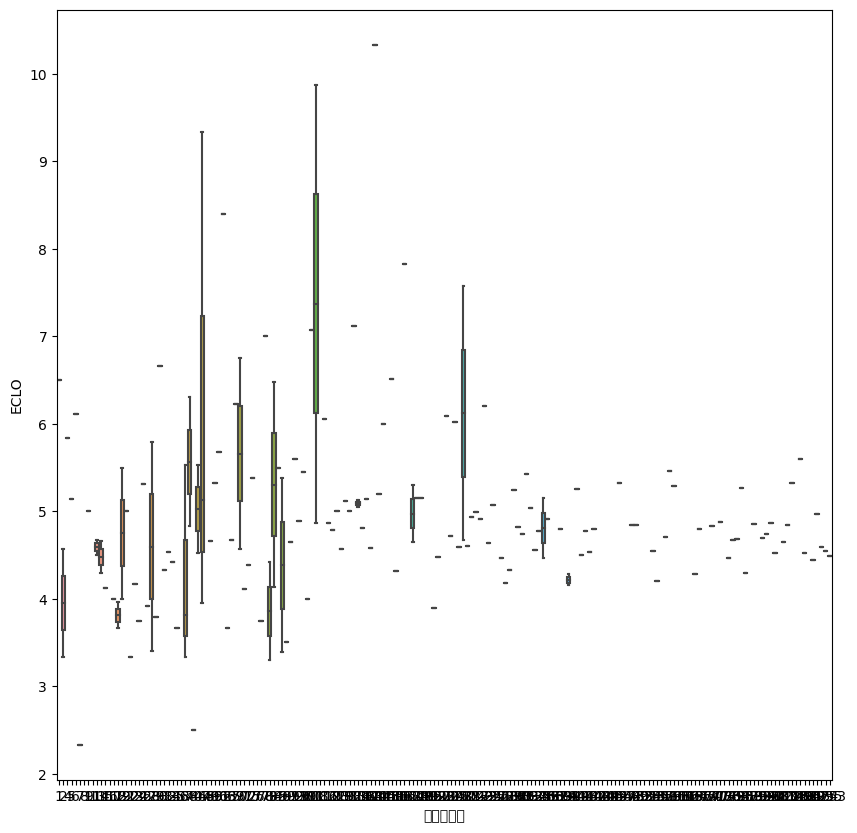

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(10,10))
sns.boxplot(x = tt_light["보안등개수"], y =tt_light["ECLO"], data=tt)
plt.show()

In [28]:
tt_crossboard = pd.merge(crossboard, mean_ECLO, on="주소", how="left")

In [29]:
tt_crossboard

,도시,횡단보도수,주소,ECLO
0,대구광역시,111,달성군-가창면,5.321739
1,대구광역시,19,수성구-가천동,5.637931
2,대구광역시,203,동구-각산동,5.137931
3,대구광역시,64,달서구-갈산동,4.909091
4,대구광역시,70,달서구-감삼동,4.738938
...,...,...,...,...
198,대구광역시,73,달서구-호산동,4.606218
199,대구광역시,45,달성군-화원읍,4.864865
200,대구광역시,1,중구-화전동,3.333333
201,대구광역시,75,수성구-황금동,4.484694


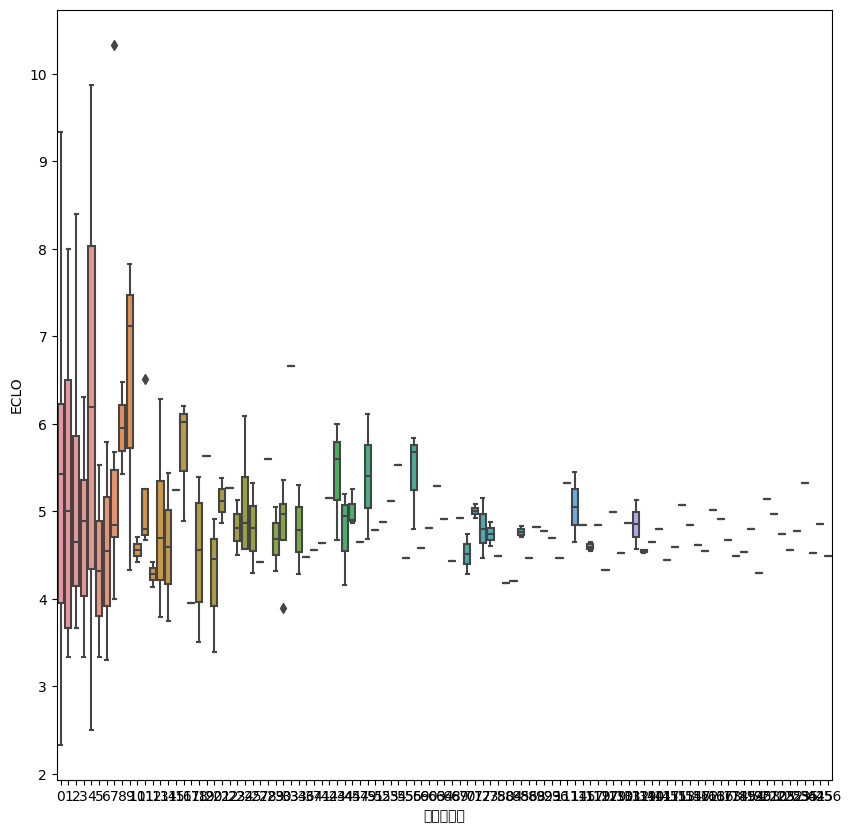

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(10, 10))
sns.boxplot(x=tt_crossboard["횡단보도수"], y=tt_crossboard["ECLO"], data=tt)
plt.show()

### 차량 대수가 많아질수록 평균 ECLO 점수의 추이

In [31]:
tt_numcar = pd.merge(numcar, mean_ECLO, on="주소", how="left")

In [32]:
tt_numcar = tt_numcar.loc[tt_numcar['소계'] <=7000]
tt_numcar

,소계,주소,ECLO
2,4841,남구-이천동,4.702703
3,2150,달서구-갈산동,4.909091
6,4044,달서구-대천동,4.867857
9,5833,달서구-본동,4.824713
14,6694,달서구-신당동,4.546457
...,...,...,...
199,168,중구-태평로3가,5.125000
200,82,중구-포정동,3.961538
201,92,중구-하서동,8.000000
202,73,중구-향촌동,3.400000


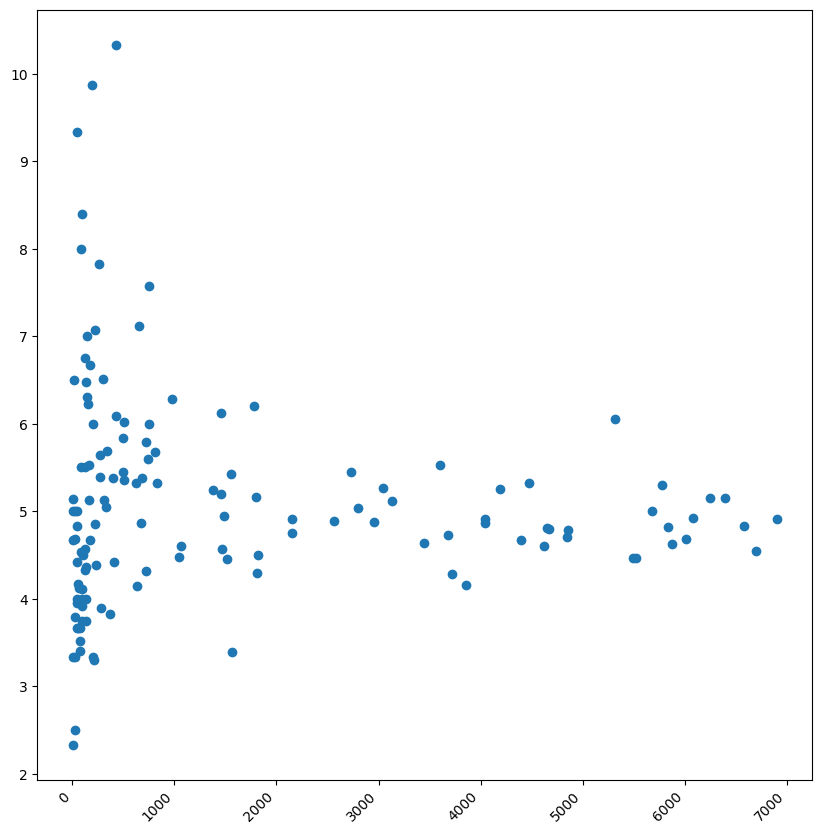

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(10, 10))
plt.scatter(x=tt_numcar["소계"], y=tt_numcar["ECLO"])

# Rotate x-axis labels
plt.xticks(rotation=45, ha="right")

plt.show()

In [34]:
tt_numcar = tt_numcar.loc[tt_numcar["소계"] <= 1000]
tt_numcar

,소계,주소,ECLO
25,497,달서구-호림동,5.833333
39,134,동구-금강동,3.750000
40,53,동구-내곡동,NaN
41,99,동구-내동,8.400000
42,129,동구-능성동,6.750000
...,...,...,...
199,168,중구-태평로3가,5.125000
200,82,중구-포정동,3.961538
201,92,중구-하서동,8.000000
202,73,중구-향촌동,3.400000


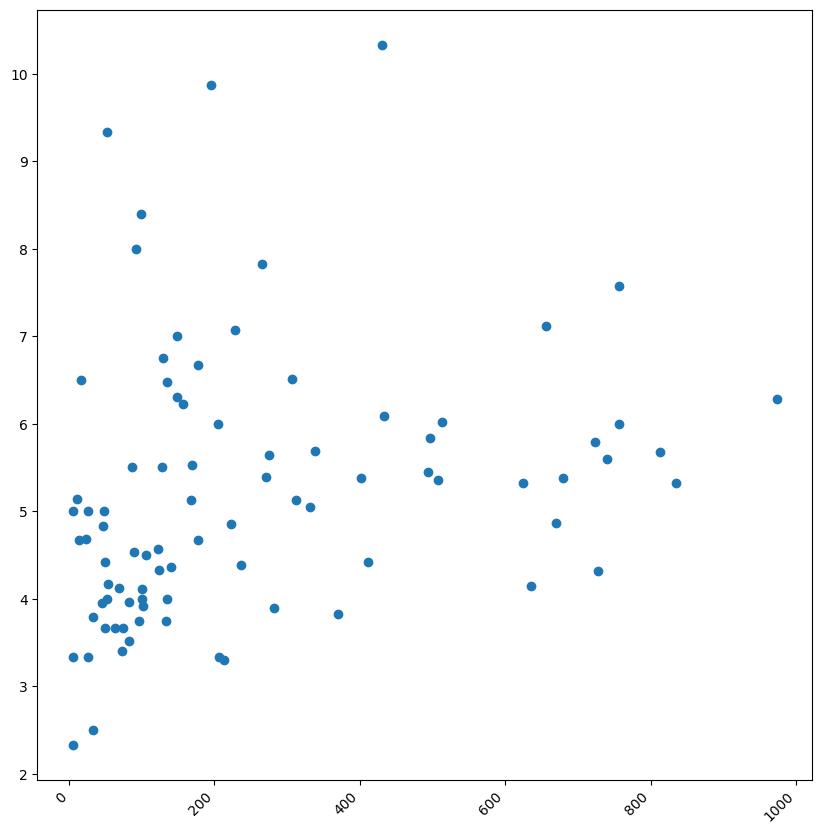

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(10, 10))
plt.scatter(x=tt_numcar["소계"], y=tt_numcar["ECLO"])

# Rotate x-axis labels
plt.xticks(rotation=45, ha="right")

plt.show()

통행량이 적은 곳일수록 사고의 위험도가 커진다.

### 경로당 수와 평균 ECLO 점수의 상관관계

In [40]:
road_pattern = r"(.+) - (.+)"
train[["도로형태1", "도로형태2"]] = train["도로형태"].str.extract(road_pattern)
train = train.drop(columns=["도로형태"])

test[["도로형태1", "도로형태2"]] = test["도로형태"].str.extract(road_pattern)
test = test.drop(columns=["도로형태"])

In [41]:
train.columns

Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반', '가해운전자 차종',
       '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별',
       '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수', 'ECLO', '연',
       '월', '일', '시간', '도시', '구', '동', '주소', '도로형태1', '도로형태2'],
      dtype='object')

In [42]:
columns_to_drop = ['ID','도시','구','동']
train.drop(columns_to_drop,axis=1,inplace=True)
test.drop(columns_to_drop,axis=1,inplace=True)

In [43]:
train_x = train[test.columns].copy()  # test.columns 값만 넣기
train_y = train["ECLO"].copy()
test_x  = test

In [44]:
train_x

,요일,기상상태,노면상태,사고유형,연,월,일,시간,주소,도로형태1,도로형태2
0,화요일,맑음,건조,차대사람,2019,1,1,0,중구-대신동,단일로,기타
1,화요일,흐림,건조,차대사람,2019,1,1,0,달서구-감삼동,단일로,기타
2,화요일,맑음,건조,차대사람,2019,1,1,1,수성구-두산동,단일로,기타
3,화요일,맑음,건조,차대차,2019,1,1,2,북구-복현동,단일로,기타
4,화요일,맑음,건조,차대차,2019,1,1,4,동구-신암동,단일로,기타
...,...,...,...,...,...,...,...,...,...,...,...
39604,금요일,맑음,건조,차대차,2021,12,31,19,수성구-수성동3가,교차로,교차로안
39605,금요일,맑음,건조,차대차,2021,12,31,19,달서구-상인동,단일로,기타
39606,금요일,맑음,건조,차대차,2021,12,31,21,달서구-월성동,교차로,교차로안
39607,금요일,맑음,건조,차대차,2021,12,31,22,달서구-장동,기타,기타


#### Train 데이터와 Test 데이터에 보안등, 차량 등록 대수, 과속 단속 CCTV 개수, 경로당 개수, 어린이 보호 구역 개수

In [45]:
join_1 = pd.merge(train_x, light_df, how="left", on='주소')
join_2 = pd.merge(join_1, numcar, how="left", on='주소')
join_3 = pd.merge(join_2, CCTV_df, how="left", on='주소')
join_4 = pd.merge(join_3, child_protect_df, how="left", on='주소')
train_x  = join_4.fillna(0).copy()

In [46]:
train_x.head()

,요일,기상상태,노면상태,사고유형,연,월,일,시간,주소,도로형태1,도로형태2,보안등개수,소계,과속단속,개수,어린이보호구역개수
0,화요일,맑음,건조,차대사람,2019,1,1,0,중구-대신동,단일로,기타,391.0,3723,0.0,4.0,2.0
1,화요일,흐림,건조,차대사람,2019,1,1,0,달서구-감삼동,단일로,기타,932.0,14425,1.0,11.0,0.0
2,화요일,맑음,건조,차대사람,2019,1,1,1,수성구-두산동,단일로,기타,473.0,7095,2.0,4.0,5.0
3,화요일,맑음,건조,차대차,2019,1,1,2,북구-복현동,단일로,기타,534.0,15972,2.0,22.0,11.0
4,화요일,맑음,건조,차대차,2019,1,1,4,동구-신암동,단일로,기타,1995.0,17871,2.0,24.0,0.0


In [47]:
join_1 = pd.merge(test_x, light_df, how="left", on="주소")
join_2 = pd.merge(join_1, numcar, how="left", on="주소")
join_3 = pd.merge(join_2, CCTV_df, how="left", on="주소")
join_4 = pd.merge(join_3, child_protect_df, how="left", on="주소")
test_x = join_5.fillna(0).copy()

In [48]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10963 entries, 0 to 10962
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   요일         10963 non-null  object 
 1   기상상태       10963 non-null  object 
 2   노면상태       10963 non-null  object 
 3   사고유형       10963 non-null  object 
 4   연          10963 non-null  int64  
 5   월          10963 non-null  int64  
 6   일          10963 non-null  int64  
 7   시간         10963 non-null  int64  
 8   주소         10963 non-null  object 
 9   도로형태1      10963 non-null  object 
 10  도로형태2      10963 non-null  object 
 11  보안등개수      10963 non-null  float64
 12  소계         10963 non-null  int64  
 13  과속단속       10963 non-null  float64
 14  개수         10963 non-null  float64
 15  어린이보호구역개수  10963 non-null  float64
dtypes: float64(4), int64(5), object(7)
memory usage: 1.3+ MB


In [49]:
from sklearn.preprocessing import LabelEncoder
from category_encoders.target_encoder import TargetEncoder

categorical_features = list(
    train_x.dtypes[train_x.dtypes == "object"].index
)  # object값 list에 넣음
# 추출된 문자열 변수 확인
display(categorical_features)  # object값 출력

for i in categorical_features:  # 인코딩 적용한 값 반환
    le = TargetEncoder(cols=[i])
    train_x[i] = le.fit_transform(train_x[i], train_y)
    test_x[i] = le.transform(test_x[i])
# target encdoer 주의사항: train은 fit_transform인 반면, test는 transform만 진행!


display(train_x.head())
display(test_x.head())

['요일', '기상상태', '노면상태', '사고유형', '주소', '도로형태1', '도로형태2']

,요일,기상상태,노면상태,사고유형,연,월,일,시간,주소,도로형태1,도로형태2,보안등개수,소계,과속단속,개수,어린이보호구역개수
0,4.627926,4.712888,4.712878,3.817650,2019,1,1,0,4.282449,4.671841,4.599599,391.0,3723,0.0,4.0,2.0
1,4.627926,4.779150,4.712878,3.817650,2019,1,1,0,4.738938,4.671841,4.599599,932.0,14425,1.0,11.0,0.0
2,4.627926,4.712888,4.712878,3.817650,2019,1,1,1,4.842715,4.671841,4.599599,473.0,7095,2.0,4.0,5.0
3,4.627926,4.712888,4.712878,4.944597,2019,1,1,2,4.208920,4.671841,4.599599,534.0,15972,2.0,22.0,11.0
4,4.627926,4.712888,4.712878,4.944597,2019,1,1,4,4.549091,4.671841,4.599599,1995.0,17871,2.0,24.0,0.0


,요일,기상상태,노면상태,사고유형,연,월,일,시간,주소,도로형태1,도로형태2,보안등개수,소계,과속단속,개수,어린이보호구역개수
0,4.920811,4.712888,4.712878,3.817650,2022,1,1,1,4.881657,4.882281,5.006142,700.0,7734,0.0,6.0,5.0
1,4.920811,4.712888,4.712878,3.817650,2022,1,1,1,4.563008,4.671841,4.599599,0.0,19756,0.0,25.0,10.0
2,4.920811,4.712888,4.712878,4.944597,2022,1,1,4,4.945578,4.882281,5.006142,0.0,1492,0.0,3.0,1.0
3,4.920811,4.712888,4.712878,4.944597,2022,1,1,4,4.438172,4.671841,4.599599,0.0,13338,2.0,23.0,7.0
4,4.920811,4.712888,4.712878,4.944597,2022,1,1,6,4.738938,4.882281,5.006142,932.0,14425,1.0,11.0,0.0


In [50]:
# 제거할 열 이름 목록
columns_to_drop = ["연", "월"]

# train_x와 test_x에서 해당 열들을 제거
train_x = train_x.drop(columns=columns_to_drop, axis=1)
test_x = test_x.drop(columns=columns_to_drop, axis=1)

In [51]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.regularizers import l1 as l1_regularizer, l2 as l2_regularizer
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from keras.wrappers.scikit_learn import KerasRegressor

# GPU 메모리 관리 설정
gpus = tf.config.experimental.list_physical_devices("GPU")
if gpus:
    try:
        # 현재 프로그램에 필요한 만큼의 GPU 메모리만 할당
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        # 프로그램 시작시에 메모리 성장을 설정해야만 합니다
        print(e)


# RMSLE 손실 함수 정의
def rmsle(y_true, y_pred):
    y_true = tf.maximum(tf.cast(y_true, tf.float32), 0)
    y_pred = tf.maximum(tf.cast(y_pred, tf.float32), 0)
    squared_error = tf.square(tf.math.log1p(y_pred) - tf.math.log1p(y_true))
    return tf.sqrt(tf.reduce_mean(squared_error))


# 모델 생성 함수 정의
def create_model(learning_rate, l1_reg, l2_reg):
    input_layer = tf.keras.Input(shape=(len(train_x.columns),))
    x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(input_layer)
    x = tf.keras.layers.Dense(
        16, activation="relu", kernel_regularizer=l1_regularizer(l1_reg)
    )(x)
    x = tf.keras.layers.Dense(
        32, activation="relu", kernel_regularizer=l2_regularizer(l2_reg)
    )(x)
    output_layer = tf.keras.layers.Dense(1)(x)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate), loss=rmsle, metrics=[rmsle]
    )
    return model


def loss_fn(y_true, y_pred):
    return rmsle(y_true, y_pred)  # 차이 손실함수 반환


def metric_fn(y_true, y_pred):
    return rmsle(y_true, y_pred)

In [52]:
callbacks_list = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=30,
        verbose=2,
        mode="min",
        restore_best_weights=True,
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.8, patience=3, min_lr=0.00001
    ),
    tf.keras.callbacks.TerminateOnNaN(),
]
"""
#EarlyStopping
val_loss: 데이터 손실을 관찰하겠다는 의미
patience: 검증데이터의 손실이 (30) epoch동안 개선되지 않으면 훈련 중단
verbose = 2:  조기 주단이 발생했을 때 화면에 로그를 표시
#mode = min: 관찰하고 있는 메트릭이 최소화 (손실 최소화)
restore_best_weights = true: 조기 중단 발생시 가장 좋은 가중치로 모델 복원

#ReduceLROnPlateau: 학습률을 동적으로 조정하는데 사용
monitor = val_loss: 검증 데이터이 손실 관찰
factor = 0.8: 손실이 개선되지 않을 때 학습률 80% 감소
patience: 3에포크 동안 손실 개선되지 않으면 학습률 조정
min_lr = 0.00001은 학습률의 하한선 설정

#TreminateOnNaN:
수치적 불안정성으로 인해 손실이 NAN이 되는 경우 훈련 즉시 중단.


"""

'\n#EarlyStopping\nval_loss: 데이터 손실을 관찰하겠다는 의미\npatience: 검증데이터의 손실이 (30) epoch동안 개선되지 않으면 훈련 중단\nverbose = 2:  조기 주단이 발생했을 때 화면에 로그를 표시\n#mode = min: 관찰하고 있는 메트릭이 최소화 (손실 최소화)\nrestore_best_weights = true: 조기 중단 발생시 가장 좋은 가중치로 모델 복원\n\n#ReduceLROnPlateau: 학습률을 동적으로 조정하는데 사용\nmonitor = val_loss: 검증 데이터이 손실 관찰\nfactor = 0.8: 손실이 개선되지 않을 때 학습률 80% 감소\npatience: 3에포크 동안 손실 개선되지 않으면 학습률 조정\nmin_lr = 0.00001은 학습률의 하한선 설정\n\n#TreminateOnNaN:\n수치적 불안정성으로 인해 손실이 NAN이 되는 경우 훈련 즉시 중단.\n\n\n'

In [53]:
# # KerasRegressor 래퍼를 사용
# model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=32, verbose=0)

# # 하이퍼파라미터 그리드 정의
# param_grid = {
#     "learning_rate": [0.1, 0.01, 0.001, 0.0001],
#     "l1_reg": [0.01, 0.001, 0.0001],
#     "l2_reg": [0.01, 0.001, 0.0001],
#     "batch_size": [32, 64, 128],
# }


# # 사용자 정의 스코어링 함수 (RMSLE)
# def rmsle_scorer(y_true, y_pred):
#     y_true = np.maximum(y_true, 0)
#     y_pred = np.maximum(y_pred, 0)
#     squared_error = np.square(np.log1p(y_pred) - np.log1p(y_true))
#     return np.sqrt(np.mean(squared_error))


# # GridSearchCV 생성
# grid = GridSearchCV(
#     estimator=model,
#     param_grid=param_grid,
#     scoring=make_scorer(rmsle_scorer, greater_is_better=False),
#     cv=3,
# )a

# # 그리드 서치 실행
# grid_result = grid.fit(train_x.astype("float32"), train_y.astype("float32"))

# # 결과 출력
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# # 결과를 데이터프레임으로 변환 후 CSV 파일로 저장
# results_df = pd.DataFrame(grid_result.cv_results_)
# results_df.to_csv("one_hot_hyperparameter_tuning_results.csv", index=False)

KeyboardInterrupt: 

In [59]:
import tensorflow as tf
from tensorflow.keras.regularizers import l1 as l1_regularizer, l2 as l2_regularizer

Best=  {"batch_size": 32, "l1_reg": 0.0001, "l2_reg": 0.0001, "learning_rate": 0.01}


# 최적화된 하이퍼파라미터를 받아 모델을 생성하는 함수
def create_optimized_model(l1_reg, l2_reg, learning_rate):
    input_layer = tf.keras.Input(shape=(len(train_x.columns),))
    x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(input_layer)
    x = tf.keras.layers.Dense(
        16, activation="relu", kernel_regularizer=l1_regularizer(l1_reg)
    )(x)
    x = tf.keras.layers.Dense(
        32, activation="relu", kernel_regularizer=l2_regularizer(l2_reg)
    )(x)
    output_layer = tf.keras.layers.Dense(1)(x)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        loss=loss_fn,
        metrics=[metric_fn],
    )
    return model


# 최적화된 하이퍼파라미터를 사용하여 모델 생성
best_params = Best
optimized_model = create_optimized_model(
    best_params["l1_reg"], best_params["l2_reg"], best_params["learning_rate"]
)

# 모델 학습
history = optimized_model.fit(
    train_x.astype("float32"),
    train_y.astype("float32"),
    epochs=100,
    batch_size=best_params["batch_size"],
    verbose=1,
    validation_split=0.1,
    callbacks=callbacks_list,
)

Epoch 1/100
1114/1114 [==============================] - 4s 3ms/step - loss: 0.4594 - metric_fn: 0.4548 - val_loss: 0.4288 - val_metric_fn: 0.4262 - lr: 0.0100
Epoch 2/100
1114/1114 [==============================] - 2s 2ms/step - loss: 0.4458 - metric_fn: 0.4443 - val_loss: 0.4320 - val_metric_fn: 0.4309 - lr: 0.0100
Epoch 3/100
1114/1114 [==============================] - 2s 2ms/step - loss: 0.4446 - metric_fn: 0.4439 - val_loss: 0.4239 - val_metric_fn: 0.4234 - lr: 0.0100
Epoch 4/100
1114/1114 [==============================] - 2s 2ms/step - loss: 0.4445 - metric_fn: 0.4440 - val_loss: 0.4251 - val_metric_fn: 0.4245 - lr: 0.0100
Epoch 5/100
1114/1114 [==============================] - 2s 2ms/step - loss: 0.4441 - metric_fn: 0.4437 - val_loss: 0.4248 - val_metric_fn: 0.4244 - lr: 0.0100
Epoch 6/100
1114/1114 [==============================] - 2s 2ms/step - loss: 0.4444 - metric_fn: 0.4441 - val_loss: 0.4240 - val_metric_fn: 0.4236 - lr: 0.0100
Epoch 7/100
1114/1114 [=================

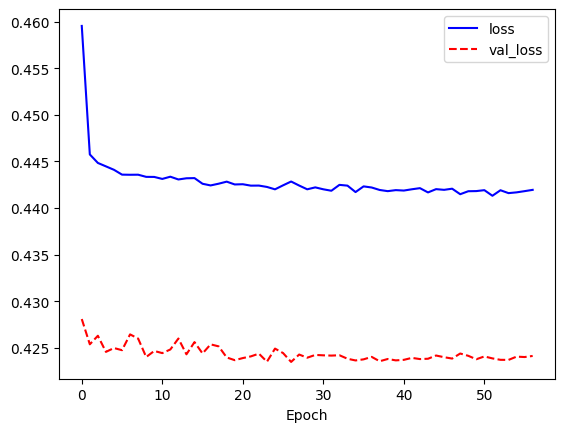

In [55]:
# train loss, val loss 시각화
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], "b-", label="loss")
plt.plot(history.history["val_loss"], "r--", label="val_loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [57]:
sample_submission = pd.read_csv(path+"./sample_submission.csv")

sample_submission["ECLO"] = optimized_model.predict(test_x.astype("float32"))

sample_submission.to_csv("Onehotencoding_dl_BEST.csv", index=False)

343/343 [==============================] - 1s 1ms/step
